## Homework 3 by Cindy Wang

In [3]:
# original bank.csv and csv are semi colon delimited file. I change to true csv file first.
# import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# read in vehicle data
bank_l = pd.read_csv('..\homework\hw3\\bank-additional-full.csv')

# explore data
print 'head:', bank_l.head()
print 'shape:', bank_l.shape
print 'info:', bank_l.info()
print 'describe:'
print bank_l.describe()    


head:    age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon ...         1    999         0  nonexistent          1.1   
1   may         mon ...         1    999         0  nonexistent          1.1   
2   may         mon ...         1    999         0  nonexistent          1.1   
3   may         mon ...         1    999         0  nonexistent          1.1   
4   may         mon ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

x: 0  feature name:  job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
dtype: int64
x: 1  feature name:  marital
married     24928
single      11568
divorced     4612
unknown        80
dtype: int64
x: 2  feature name:  education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
dtype: int64
x: 3  feature name:  default
no         32588
unknown     8597
yes            3
dtype: int64
x: 4  feature name:  housing
yes        21576
no         18622
unknown      990
dtype: int64
x: 5  feature name:  loan
no         33950
yes         6248
unknown      990
dtype: int64
x: 6  feature name: 

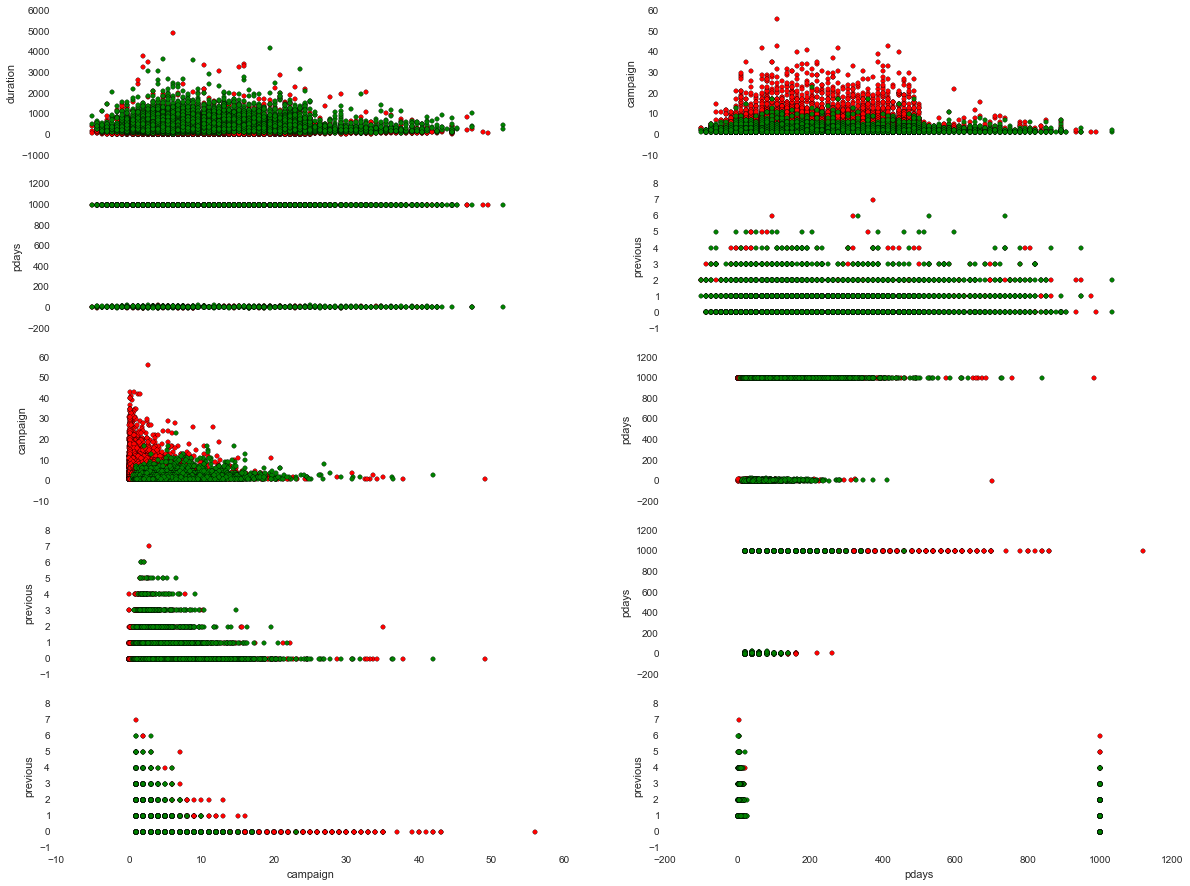

In [4]:
# Code y to binary
bank_l['y_binary'] = bank_l.y.map(lambda x: 1 if x == 'yes' else 0)
bank_l.y_binary.value_counts()

# Categorical varialbes 11
features_object = ['job','marital','education','default','housing','loan','contact','month', 'day_of_week', 'poutcome','y']

#print unique and frequency of each column 
for x in np.arange(len(features_object)):
    print 'x:', x, ' feature name: ', features_object[x]
    print bank_l[features_object[x]].value_counts()
    
# Summarize categorical variable relationship to response rate   
for x in np.arange(len(features_object)):
    print 'x:', x, ' feature name: ', features_object[x]
    print bank_l.groupby(features_object[x]).y_binary.mean().order(ascending = False)

# Economic varialbes 5
features_float = ['emp.var.rate','cons.price.idx','cons.conf.idx',
                  'euribor3m','nr.employed']

bank_l_float_df = bank_l[features_float]

for x in np.arange(len(features_float)):
    print 'x:', x, ' feature name: ', features_float[x]
    print bank_l[features_float[x]].value_counts()
    
# Summarize economic variable relationship to response rate   
for x in np.arange(len(features_float)):
    print 'x:', x, ' feature name: ', features_float[x]
    print bank_l.groupby(features_float[x]).y_binary.mean().order(ascending = False)


#plot out continuous variable (5) relationship to response
features_int = ['age','duration','campaign','pdays','previous']
bank_l_int_df = bank_l[features_int]
print type(bank_l_int_df)
print bank_l_int_df.head()

fig, axes = plt.subplots(nrows=5, ncols=2)

colors = ['r','g']

for i in range(2): 
    tmp = bank_l_int_df[bank_l.y_binary == i]
    tmp.plot(x=0,y=1, kind='scatter', c=colors[i], ax=axes[0,0], figsize=(20,15))

for i in range(2): 
    tmp = bank_l_int_df[bank_l.y_binary == i]
    tmp.plot(x=0,y=2, kind='scatter', c=colors[i], ax=axes[0,1])

for i in range(2): 
    tmp = bank_l_int_df[bank_l.y_binary == i]
    tmp.plot(x=0,y=3, kind='scatter', c=colors[i], ax=axes[1,0])
    
for i in range(2): 
    tmp = bank_l_int_df[bank_l.y_binary == i]
    tmp.plot(x=0,y=4, kind='scatter', c=colors[i], ax=axes[1,1])

for i in range(2): 
    tmp = bank_l_int_df[bank_l.y_binary == i]
    tmp.plot(x=1,y=2, kind='scatter', c=colors[i], ax=axes[2,0])

for i in range(2): 
    tmp = bank_l_int_df[bank_l.y_binary == i]
    tmp.plot(x=1,y=3, kind='scatter', c=colors[i], ax=axes[2,1])
for i in range(2): 
    tmp = bank_l_int_df[bank_l.y_binary == i]
    tmp.plot(x=1,y=4, kind='scatter', c=colors[i], ax=axes[3,0])

for i in range(2): 
    tmp = bank_l_int_df[bank_l.y_binary == i]
    tmp.plot(x=2,y=3, kind='scatter', c=colors[i], ax=axes[3,1])

for i in range(2): 
    tmp = bank_l_int_df[bank_l.y_binary == i]
    tmp.plot(x=2,y=4, kind='scatter', c=colors[i], ax=axes[4,0])
    
for i in range(2): 
    tmp = bank_l_int_df[bank_l.y_binary == i]
    tmp.plot(x=3,y=4, kind='scatter', c=colors[i], ax=axes[4,1])



In [6]:
# Code categorical independent variables of more than two possible value
dummies_job = pd.get_dummies(bank_l.job, prefix='job').ix[:, 1:]
dummies_marital = pd.get_dummies(bank_l.marital, prefix='marital').ix[:, 1:]
dummies_education = pd.get_dummies(bank_l.education, prefix='education').ix[:, 1:]
dummies_default = pd.get_dummies(bank_l.default, prefix='default').ix[:, 1:]
dummies_housing = pd.get_dummies(bank_l.housing, prefix='housing').ix[:, 1:]
dummies_loan = pd.get_dummies(bank_l.loan, prefix='loan').ix[:, 1:]
dummies_contact = pd.get_dummies(bank_l.contact, prefix='contact').ix[:, 1:]
dummies_month = pd.get_dummies(bank_l.month, prefix='month').ix[:, 1:]
dummies_dayofweek = pd.get_dummies(bank_l.day_of_week, prefix='day_of_week').ix[:, 1:]
dummies_poutcome = pd.get_dummies(bank_l.poutcome, prefix='poutcome').ix[:, 1:]


X= pd.concat([bank_l_int_df, 
              bank_l_float_df,
              dummies_job,
              dummies_marital,
              dummies_education,
              dummies_default,
              dummies_housing,
              dummies_loan,
              dummies_contact,
              dummies_month,
              dummies_dayofweek,
              dummies_poutcome ], axis=1)

y = bank_l.y_binary

print 'final type:', type(X)
print X.head()

print 'Prior dummy shape:', bank_l.shape
print 'Post dummy shape:', X.shape


final type: <class 'pandas.core.frame.DataFrame'>
   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed        ...         month_may  \
0          -36.4      4.857         5191        ...                 1   
1          -36.4      4.857         5191        ...                 1   
2          -36.4      4.857         5191        ...                 1   
3          -36.4      4.857         5191        ...                 1   
4          -36.4      4.857         5191        ...                 1   

   month_nov  month_oct  month_sep  day_of_week_

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[0.82272864906241827, 0.79379141379322138, 0.76611295385307976, 0.76390414550323604, 0.75790724961063061, 0.74571786227153536, 0.68997379560786376, 0.67491865660985861, 0.66782861992677522, 0.6679258193087837, 0.66571637424314833, 0.66316725898921836, 0.6583358006070259, 0.65117383272603624, 0.6509794752306356, 0.64874575242768528, 0.64906143965449448, 0.64928008078272659]


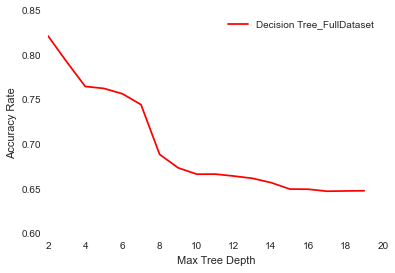

In [7]:
# split into train/test
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import seaborn as sns

x_axis = []
y_axis = []
for k in range(20)[2:]:
    dtc = DecisionTreeClassifier(max_depth=k, random_state=1)
    scores = cross_val_score(dtc, X, y, cv=10, scoring='accuracy')
    #print 'For max depth:', k
    x_axis.append(k)
    #print 'Decision tree accuracy: {}'.format(np.mean(scores))
    y_axis.append(np.mean(scores))

print x_axis
print y_axis

ig, ax = plt.subplots(1,1)
ax.plot(x_axis, y_axis, color='red', label = 'Decision Tree_FullDataset')
ax.set_ylabel('Accuracy Rate')
ax.set_xlabel('Max Tree Depth')
ax.legend(loc='upper right',frameon=True)


In [8]:
# Predict based on final model
treeclf = DecisionTreeClassifier(max_depth=2, random_state=1)
treeclf.fit(X, y)
feature_cols = X.columns
pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_}).sort(['importance'], ascending=False)


,feature,importance
1,duration,0.542029
9,nr.employed,0.457971
40,month_jul,0.000000
29,education_university.degree,0.000000
30,education_unknown,0.000000
31,default_unknown,0.000000
32,default_yes,0.000000
33,housing_unknown,0.000000
34,housing_yes,0.000000
35,loan_unknown,0.000000


In [15]:
# visualize the tree

with open("Images\hw3_bankfull.dot", 'wb') as f:
    f = export_graphviz(treeclf, out_file=f, feature_names=feature_cols)

